In [43]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import numpy as np

In [44]:
def extrairDados():
    df = pd.read_csv('../brazilian_cities.csv', header=None)

    numeros = []
    for value in df[4]:
        try:
            numeros.append(int(value))
        except ValueError:
            print(f"Impossível converter valor {value} para inteiro.")
            continue

    return numeros

In [45]:
def calcularMedia(numeros):
    return sum(numeros) / len(numeros)

def calcularMediana(numeros):
    numerosOrdenados = sorted(numeros)
    tamanhoDaLista = len(numeros)
    meioDaLista = tamanhoDaLista // 2

    if tamanhoDaLista % 2 == 0:
        return numerosOrdenados[meioDaLista - 1] + numerosOrdenados[meioDaLista] / 2
    
    return numerosOrdenados[meioDaLista]

def calcularVariancia(numeros, isPopulacional):
    media = calcularMedia(numeros)
    tamanhoDaLista = len(numeros)
    somatoria = sum((n - media) ** 2 for n in numeros)

    if isPopulacional: return somatoria / tamanhoDaLista

    return somatoria / (tamanhoDaLista - 1)

def calcularDesvio(numeros, isPopulacional):
    return calcularVariancia(numeros, isPopulacional) ** 0.5

def calcularCoeficienteVariacao(numeros, isPopulacional):
    media = calcularMedia(numeros)
    desvioPadrao = calcularDesvio(numeros, isPopulacional)

    return (desvioPadrao / media) * 100

def calcularQuartis(numeros):
    numerosOrdenados = sorted(numeros)
    tamanhoDaLista = len(numerosOrdenados)

    if tamanhoDaLista % 2 == 0:
        metade_inferior = numerosOrdenados[:tamanhoDaLista // 2]
        Q1 = calcularMediana(metade_inferior)
    else:
        metade_inferior = numerosOrdenados[:tamanhoDaLista // 2]
        Q1 = calcularMediana(metade_inferior)

    Q2 = calcularMediana(numerosOrdenados)

    if tamanhoDaLista % 2 == 0:
        metade_superior = numerosOrdenados[tamanhoDaLista // 2:]
        Q3 = calcularMediana(metade_superior)
    else:
        metade_superior = numerosOrdenados[(tamanhoDaLista // 2) + 1:]
        Q3 = calcularMediana(metade_superior)
    
    return Q1, Q2, Q3

In [46]:
def gerarHistograma(numeros):
    plt.hist(numeros, bins=10, color='blue', alpha=0.7)
    plt.title('Histograma')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

def gerarBoxPlot(numeros):
    plt.boxplot(numeros)
    plt.title('Box Plot')
    plt.grid(True)
    plt.show()

In [47]:

def gerarEstatisticas(numeros, isManual):
    estatisticas = {
        'Média': calcularMedia(numeros) if isManual else np.mean(numeros),
        'Mediana': calcularMediana(numeros) if isManual else np.median(numeros),
        'Variância Populacional': calcularVariancia(numeros, True) if isManual else np.var(numeros),
        'Variância Amostral' : calcularVariancia(numeros, False) if isManual else np.var(numeros, ddof=1),
        'Desvio Padrão Populacional': calcularDesvio(numeros, True) if isManual else np.std(numeros),
        'Desvio Padrão Amostral': calcularDesvio(numeros, False) if isManual else np.std(numeros, ddof=1),
        'Coeficiente de Variação Populacional':  calcularCoeficienteVariacao(numeros, True) if isManual else (np.var(numeros) / np.mean(numeros)) * 100,
        'Coeficiente de Variação Amostral':  calcularCoeficienteVariacao(numeros, False) if isManual else (np.var(numeros) / np.mean(numeros)) * 100,
        'Quartis': calcularQuartis(numeros) if isManual else np.percentile(numeros, [25, 50, 75])       
    }

    return estatisticas

In [48]:
def gerarGraficos(numeros, isManual):
    if isManual:
        print("\nGerando histogramas e box plots com as funções criadas por mim...")
        gerarHistograma(numeros)
        gerarBoxPlot(numeros)
    else:
        print("\nGerando histogramas e box plots com as funções prontas...")
        plt.hist(numeros, bins=10, color='blue', alpha=0.7)
        plt.title('Histograma (Pronto)')
        plt.xlabel('Valores')
        plt.ylabel('Frequência')
        plt.grid(True)
        plt.show()

        plt.boxplot(numeros)
        plt.title('Box Plot (Pronto)')
        plt.grid(True)
        plt.show()

Impossível converter valor osm_id para inteiro.
Utilizando as funções criadas por mim:
{'Média': 507600620.1982047, 'Mediana': 623282562.5, 'Variância Populacional': 5.579205432726528e+17, 'Variância Amostral': 5.5802072652696646e+17, 'Desvio Padrão Populacional': 746940789.6698725, 'Desvio Padrão Amostral': 747007849.0397316, 'Coeficiente de Variação Populacional': 147.15127601266755, 'Coeficiente de Variação Amostral': 147.16448706229806, 'Quartis': (368180266, 623282562.5, 415523260)}

Utilizando as funções prontas:
{'Média': np.float64(507600620.1982047), 'Mediana': np.float64(415521708.5), 'Variância Populacional': np.float64(5.579205432726528e+17), 'Variância Amostral': np.float64(5.5802072652696646e+17), 'Desvio Padrão Populacional': np.float64(746940789.6698725), 'Desvio Padrão Amostral': np.float64(747007849.0397316), 'Coeficiente de Variação Populacional': np.float64(109913290305.83128), 'Coeficiente de Variação Amostral': np.float64(109913290305.83128), 'Quartis': array([3.6

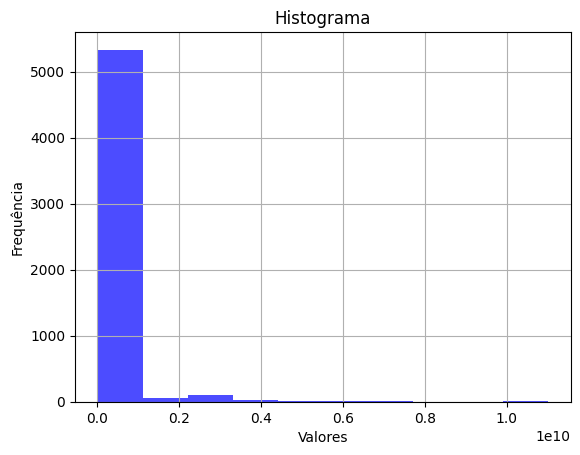

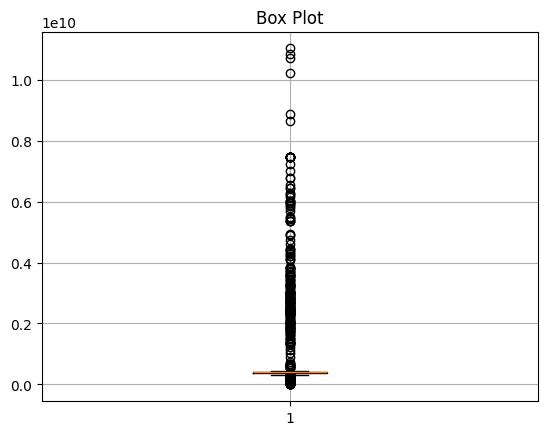


Gerando histogramas e box plots com as funções prontas...


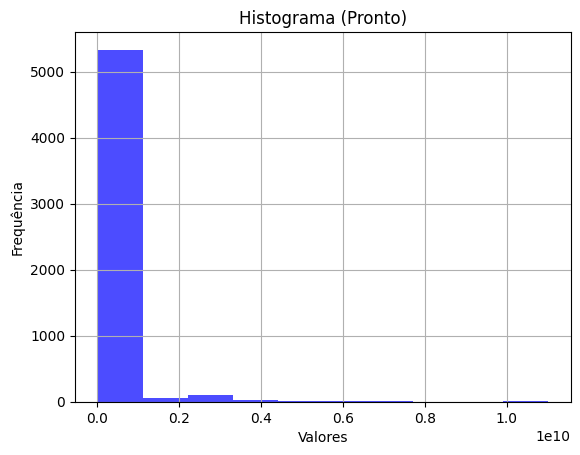

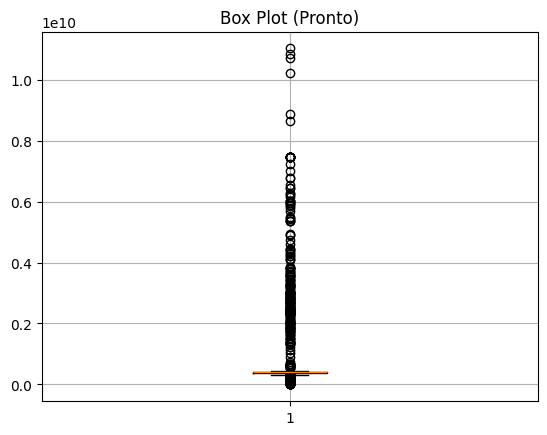

In [49]:
numeros = extrairDados()

print(f"Utilizando as funções criadas por mim:\n{gerarEstatisticas(numeros, True)}\n")
print(f"Utilizando as funções prontas:\n{gerarEstatisticas(numeros, False)}\n")

gerarGraficos(numeros, True)
gerarGraficos(numeros, False)